In [657]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

%matplotlib inline

In [658]:
# Reading in the April Covid-19 Bing Searches data set 
data_raw = pd.read_csv('Covid_Searches_16-3.csv')
data_raw.head()

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,4/1/20,spain coronavirus,FALSE,Arizona,United States,1
1,4/1/20,how long does coronavirus live on surfaces,FALSE,California,United States,3
2,4/1/20,dati coronavirus,FALSE,Tuscany,Italy,4
3,4/1/20,italy coronavirus update,FALSE,England,United Kingdom,4
4,4/1/20,new mexico coronavirus update,FALSE,New Mexico,United States,1


In [659]:
#checking original shape of dataset 
data_raw.shape

(521791, 6)

In [660]:
#checking original data types of dataset 
data_raw.dtypes

Date                object
Query               object
IsImplicitIntent    object
State               object
Country             object
PopularityScore     object
dtype: object

We want to focus our analysis only on states within the United States. Therefore, we will subset the data to only include entries from the United States.

In [661]:
# subsetting dataset to only include queries from the United States
data = data_raw[data_raw.Country == "United States"]
data.head()

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,4/1/20,spain coronavirus,FALSE,Arizona,United States,1
1,4/1/20,how long does coronavirus live on surfaces,FALSE,California,United States,3
4,4/1/20,new mexico coronavirus update,FALSE,New Mexico,United States,1
7,4/1/20,pa coronavirus map,FALSE,New York,United States,1
9,4/1/20,corona virus tracker,FALSE,Arizona,United States,1


Below we are cleaning the data frame by changing the data types of the columns PopularityScore, Date, and IsImplicitIntent to respective data types integer, date, and boolean. We are also removing the Country column since that is no longer needed. Finally, we are checking for null values.

In [662]:
# changing Popularity Score data type to int
data.PopularityScore = data.PopularityScore.astype(int)
data.dtypes

Date                object
Query               object
IsImplicitIntent    object
State               object
Country             object
PopularityScore      int64
dtype: object

In [663]:
data.Date = pd.to_datetime(data['Date'])
data.head()

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2020-04-01,spain coronavirus,FALSE,Arizona,United States,1
1,2020-04-01,how long does coronavirus live on surfaces,FALSE,California,United States,3
4,2020-04-01,new mexico coronavirus update,FALSE,New Mexico,United States,1
7,2020-04-01,pa coronavirus map,FALSE,New York,United States,1
9,2020-04-01,corona virus tracker,FALSE,Arizona,United States,1


In [664]:
data.IsImplicitIntent = data.IsImplicitIntent.astype(bool) #changed IsImplicitIntent to boolean data type (True/False)
data.shape

(282839, 6)

In [665]:
data_1 = data.drop("Country", axis=1) #removed Country column since all logs are from the States now!

In [666]:
# all null values were dropped when only looking at US Queries 
data_1.isna().sum()

Date                0
Query               0
IsImplicitIntent    0
State               0
PopularityScore     0
dtype: int64

In [667]:
data_1.head()

,Date,Query,IsImplicitIntent,State,PopularityScore
0,2020-04-01,spain coronavirus,True,Arizona,1
1,2020-04-01,how long does coronavirus live on surfaces,True,California,3
4,2020-04-01,new mexico coronavirus update,True,New Mexico,1
7,2020-04-01,pa coronavirus map,True,New York,1
9,2020-04-01,corona virus tracker,True,Arizona,1


Our hypothesis is that when there is an outbreak of Covid-19, there will be an increase in searches related to having the virus. We are filtering out words, such as symptoms or signs, and seeing if their is a pattern in their frequency and how it related to the actual number of confirmed cases.

In [668]:
# list of signifying words 
sig_words = ["symptoms","symptom","symtom", "symptome", "cough", "fever", "sick", "do I have", "how to tell", "how to know",
             "self-diagnos", "what to do", "cure", "vaccine", "vaccin", "flu", "hospital", "treatment", "sign", " ill ", "cold", 
             "vomit", "puke", "throw up", "spew", "pale", "gruesome", "remedy", "curative", "therapeutic", "handle", " heal ",
             "signal", "indication", "indicate", "contract", ]

In [669]:
data_2 = data_1[data_1["Query"].str.contains('|'.join(sig_words))]

In [670]:
data_2.head(50)

,Date,Query,IsImplicitIntent,State,PopularityScore
53,2020-04-01,what are the symptoms of the coronavirus,True,Arizona,1
109,2020-04-01,coronavirus treatment,True,Colorado,1
222,2020-04-01,coronavirus treatment update,True,California,1
244,2020-04-01,signs and symptoms of coronavirus,True,New York,1
314,2020-04-01,coronavirus symptoms,True,New Mexico,10
372,2020-04-01,coronavirus treatment,True,Arizona,1
402,2020-04-01,covid 19 symptoms,True,Colorado,3
404,2020-04-01,corona virus treatment,True,California,1
418,2020-04-01,signs of coronavirus,True,New York,1
431,2020-04-01,early symptoms of coronavirus,True,Arizona,1


We're binning the dates to 10 bins of 3 days.

In [671]:
data_2['Binned'] = pd.cut(data_2['Date'], bins = 10)

In [672]:
data_2.shape

(10623, 6)

We're creating a chart that has the the total popularity score for each day for each state. Then, with this data, we are creating a heat map to see which states have higher numbers of queries relating to potentially being infected, and how it changes over time. 

In [673]:
chart = data_2.pivot_table(index="Date", 
               columns='State', 
               values='PopularityScore',
               aggfunc='sum')
chart.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District Of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,32.0,18.0,44.0,24.0,75.0,35.0,36.0,17.0,39.0,55.0,...,15.0,43.0,63.0,21.0,17.0,51.0,35.0,20.0,30.0,7.0
2020-04-02,36.0,15.0,50.0,18.0,78.0,50.0,60.0,11.0,30.0,63.0,...,14.0,52.0,86.0,13.0,NaN,53.0,39.0,28.0,41.0,8.0
2020-04-03,19.0,10.0,32.0,17.0,67.0,29.0,38.0,9.0,29.0,54.0,...,6.0,38.0,65.0,22.0,NaN,47.0,32.0,19.0,32.0,4.0
2020-04-04,23.0,7.0,29.0,18.0,48.0,22.0,23.0,3.0,23.0,43.0,...,4.0,27.0,51.0,11.0,7.0,32.0,23.0,17.0,22.0,NaN
2020-04-05,19.0,NaN,28.0,8.0,38.0,25.0,27.0,8.0,15.0,40.0,...,6.0,26.0,42.0,13.0,7.0,34.0,23.0,14.0,18.0,4.0


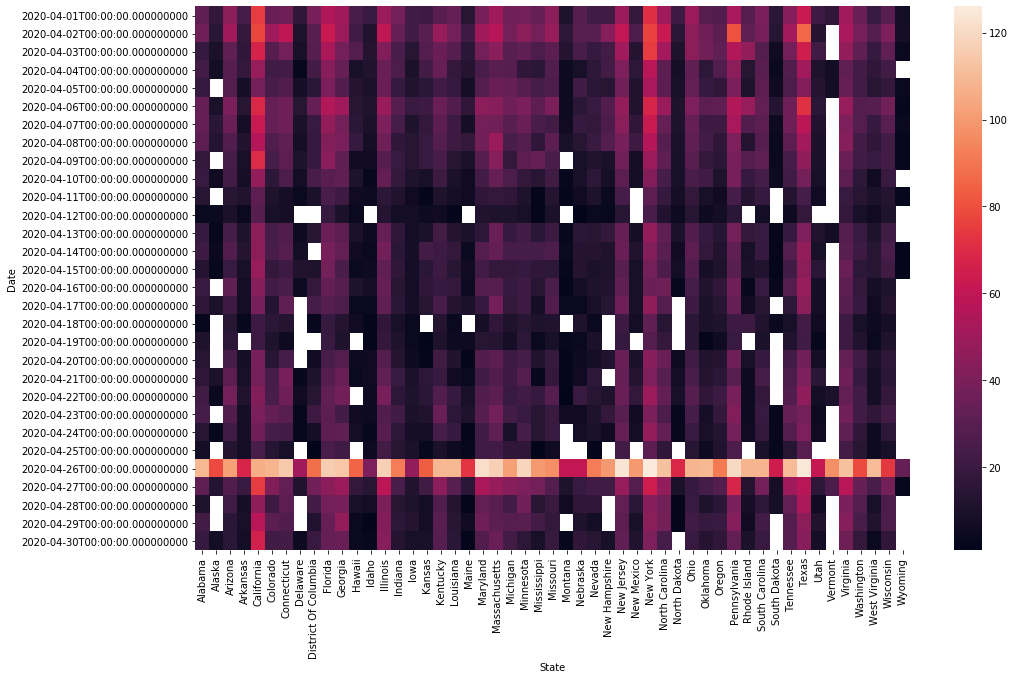

In [674]:
plt.figure(figsize=(16, 10))
heat_map = sns.heatmap(chart)

On April 26th, it appears that all states had a major increase in searches. 

In [675]:
# Creating same chart but condensed to the binned dates, instead of all 30 days 
chart_ex = data_2.pivot_table(index="Binned", 
               columns='State', 
               values='PopularityScore',
               aggfunc='sum')
chart_ex.head(10)

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District Of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Binned,,,,,,,,,,,,,,,,,,,,,
"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]",87.0,43.0,126.0,59.0,220.0,114.0,134.0,37.0,98.0,172.0,...,35.0,133.0,214.0,56.0,17.0,151.0,106.0,67.0,103.0,19.0
"(2020-04-03 21:36:00, 2020-04-06 19:12:00]",76.0,17.0,97.0,40.0,155.0,81.0,86.0,25.0,72.0,139.0,...,23.0,89.0,165.0,39.0,14.0,114.0,74.0,60.0,77.0,7.0
"(2020-04-06 19:12:00, 2020-04-09 16:48:00]",83.0,28.0,86.0,29.0,190.0,85.0,99.0,29.0,58.0,133.0,...,13.0,91.0,157.0,32.0,NaN,119.0,73.0,56.0,76.0,10.0
"(2020-04-09 16:48:00, 2020-04-12 14:24:00]",38.0,10.0,47.0,24.0,107.0,36.0,42.0,11.0,35.0,74.0,...,5.0,40.0,80.0,15.0,NaN,69.0,39.0,22.0,44.0,3.0
"(2020-04-12 14:24:00, 2020-04-15 12:00:00]",53.0,10.0,71.0,33.0,137.0,67.0,77.0,24.0,25.0,112.0,...,6.0,69.0,133.0,36.0,7.0,93.0,57.0,39.0,69.0,4.0
"(2020-04-15 12:00:00, 2020-04-18 09:36:00]",40.0,10.0,67.0,17.0,103.0,51.0,70.0,5.0,45.0,81.0,...,7.0,53.0,115.0,22.0,NaN,81.0,46.0,19.0,32.0,NaN
"(2020-04-18 09:36:00, 2020-04-21 07:12:00]",42.0,10.0,71.0,17.0,98.0,49.0,68.0,3.0,17.0,73.0,...,NaN,61.0,100.0,26.0,NaN,90.0,53.0,22.0,42.0,NaN
"(2020-04-21 07:12:00, 2020-04-24 04:48:00]",60.0,7.0,87.0,28.0,118.0,82.0,89.0,12.0,43.0,94.0,...,6.0,89.0,125.0,18.0,10.0,102.0,61.0,30.0,57.0,NaN
"(2020-04-24 04:48:00, 2020-04-27 02:24:00]",148.0,92.0,142.0,95.0,206.0,164.0,157.0,63.0,126.0,186.0,...,75.0,174.0,213.0,78.0,123.0,193.0,127.0,140.0,121.0,37.0


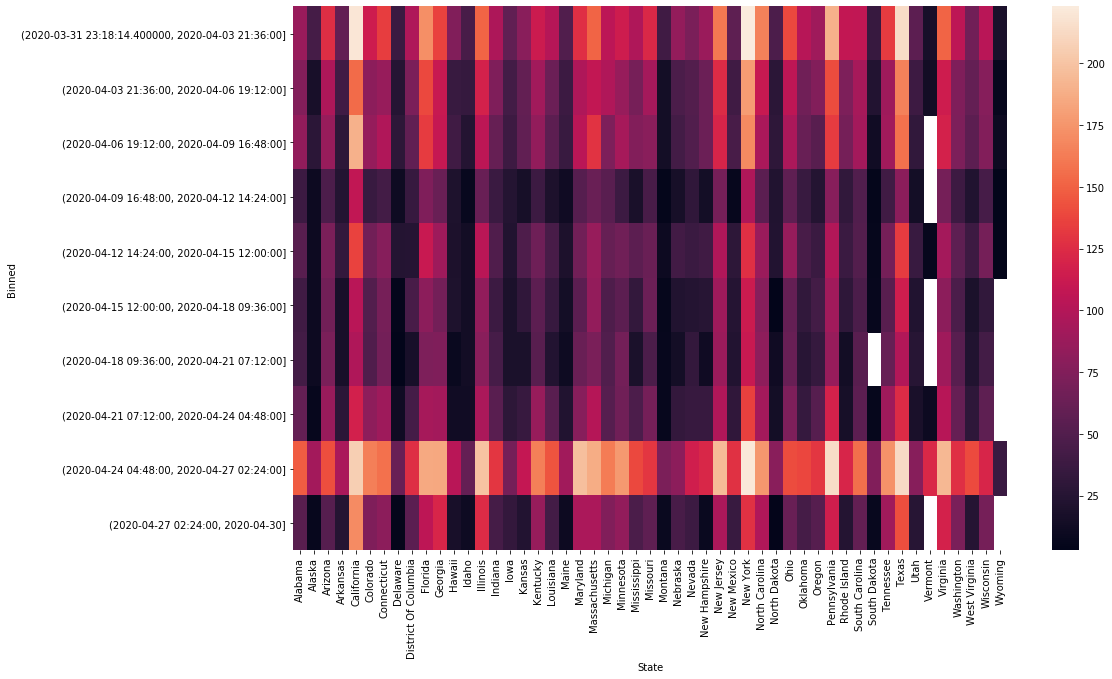

In [676]:
plt.figure(figsize=(16, 10))
heat_map_2 = sns.heatmap(chart_ex)

In [677]:
#Checking that all states are accounted for 
a = data_2.State.unique()
len(a)

51

Below, we are creating a chart that has the total popularity score per State and is ignoring the date. This will show, overall, which state has the most queries. 

In [678]:
chart_2 = data_2.groupby(["State"]).aggregate({'PopularityScore': sum }).sort_values(by = "PopularityScore",ascending = False)
chart_2

,PopularityScore
State,
New York,1506
California,1504
Texas,1444
Pennsylvania,1268
Florida,1170
New Jersey,1141
Virginia,1131
Illinois,1124
Massachusetts,1076


Now, we are grouping the total popularity score by date, to see which day has the most searches, at the greatest frequency.

In [679]:
chart_3 = data_2.groupby(["Date"]).aggregate({'PopularityScore': sum }).sort_values(by = "PopularityScore",ascending = False)
chart_3

,PopularityScore
Date,
2020-04-26,4826
2020-04-02,1981
2020-04-01,1742
2020-04-27,1655
2020-04-06,1626
2020-04-03,1564
2020-04-07,1366
2020-04-08,1264
2020-04-04,1161


As we can see, on April 26th, there is a huge spike in the popularity score total, potentially indicating a spike in COVID-19 cases. 

This graph below shows the trend in popularity scores over the month. 

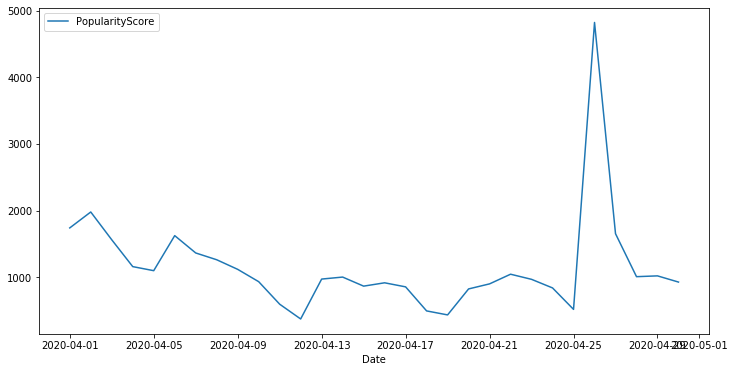

In [680]:
plt.figure(figsize=(12, 6))
graph_3 = sns.lineplot(data = chart_3)
#graph_3.set_xticklabels(graph_3.get_xticklabels, rotation=45)
graph_3
# Don't know why its not rotating 

Now, we are plotting the same graph, but to show the trend more each state. 

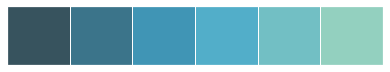

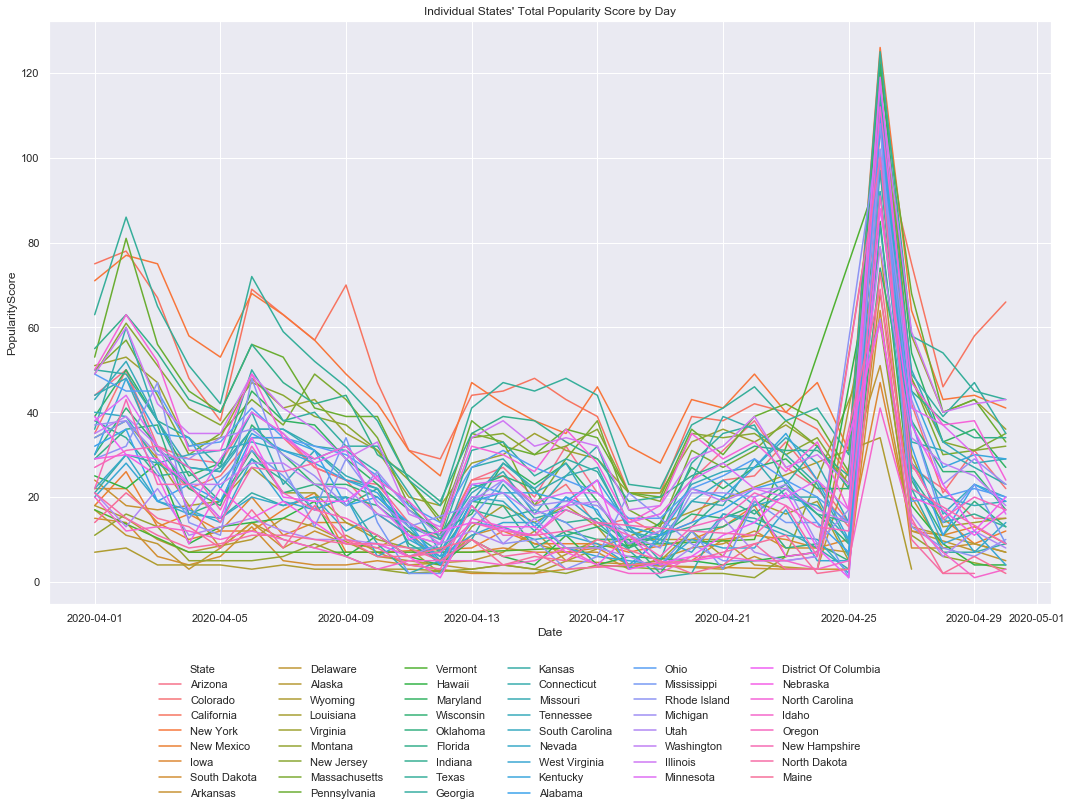

In [858]:
#sns.set()
sns.set(style = "darkgrid")
sns.lineplot( x = "Date", y = data_2.PopularityScore, data = data_2, estimator = "sum", hue = "State", ci = None).set_title(
    "Individual States' Total Popularity Score by Day")
plt.legend(loc='lower left', bbox_to_anchor=(0.1, -.35), ncol=6)


There was the 2nd highest peak in new cases in the US on May 1st, 5 days after April 26th.

We are not sure why the peak is so much higher than the other days, but this peak could signify an outbreak before tests came back. 

https://www.worldometers.info/coronavirus/country/us/

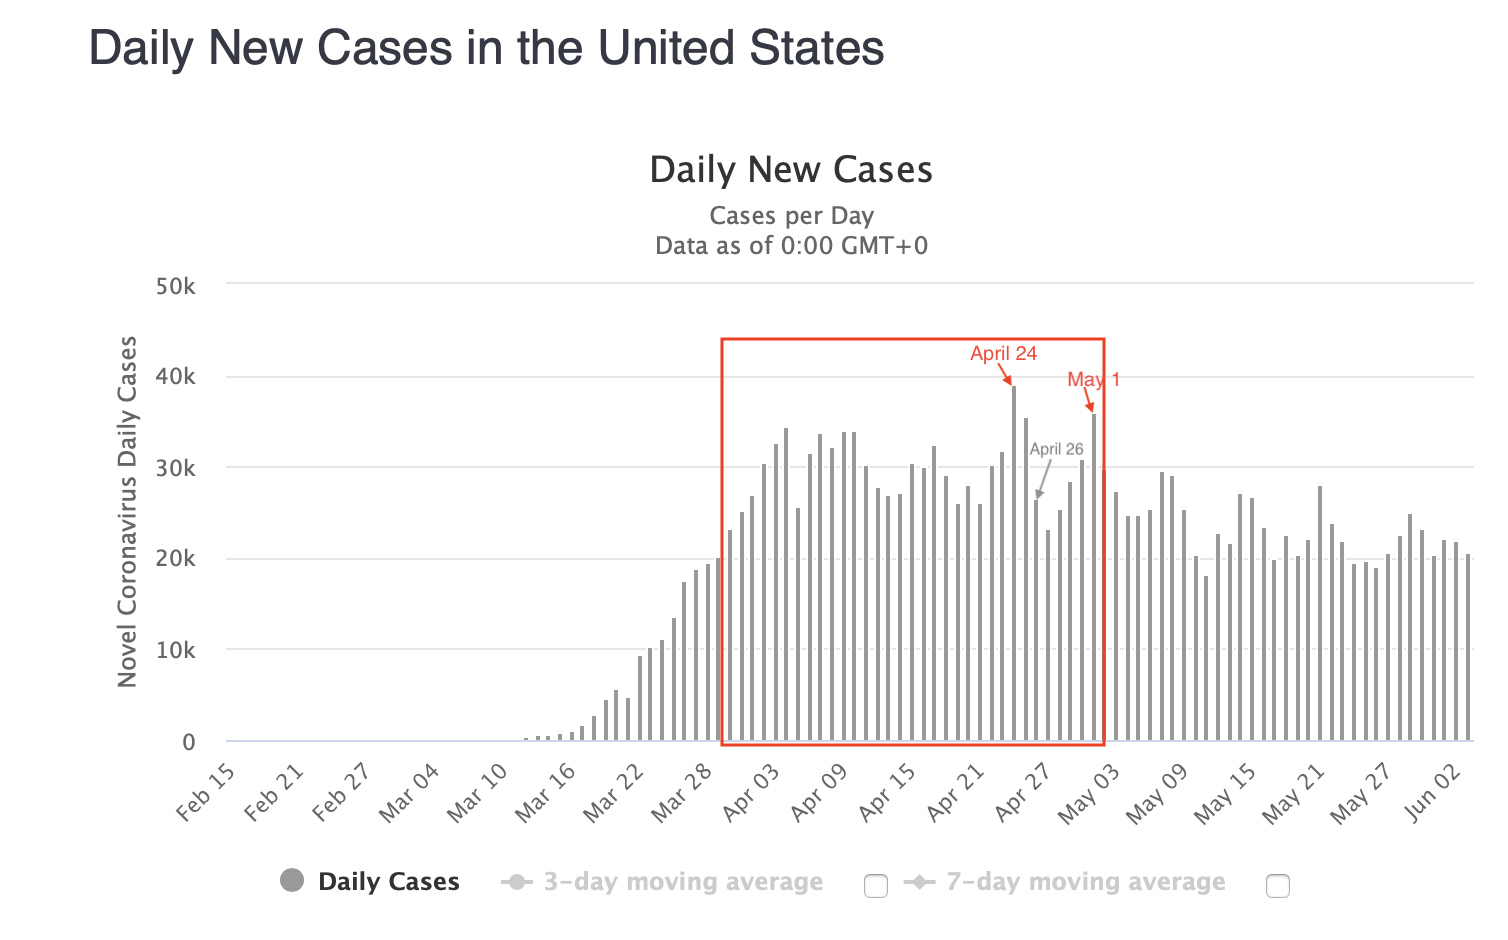

In [682]:
from IPython.display import Image
Image("Daily New Cases US.png")

In [683]:
data_2.head()

,Date,Query,IsImplicitIntent,State,PopularityScore,Binned
53,2020-04-01,what are the symptoms of the coronavirus,True,Arizona,1,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]"
109,2020-04-01,coronavirus treatment,True,Colorado,1,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]"
222,2020-04-01,coronavirus treatment update,True,California,1,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]"
244,2020-04-01,signs and symptoms of coronavirus,True,New York,1,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]"
314,2020-04-01,coronavirus symptoms,True,New Mexico,10,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]"


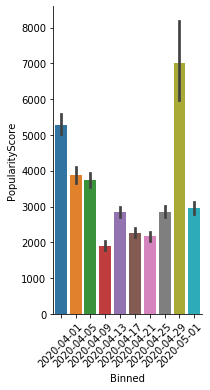

In [684]:
# graphing popularity score totals for each binned dates
graph_4 = sns.catplot( x = "Binned", y = "PopularityScore", data = data_2, kind = "bar", estimator= sum)
graph_4.set_xticklabels(graph_3.get_xticklabels(), rotation=45)

HYPOTHESIS TESTING 

We will perform hypothesis tests to determine if different states follow the trend of having more of less new cases than other states by comparing the total popularity scores for each day of the month. For example, if New York has a greater popularity score total than another state, it supports our hypothesis that we can use this search data to predict when there will be a spike in new cases.

In [685]:
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats

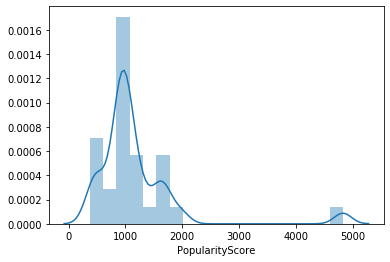

In [686]:
# distribution of total popularity scores from each day
# it is approximately normal, excluding the obvious outlier from April 26th 
sns.distplot( chart_3.PopularityScore )

In [687]:
ny_scores = data_2[data_2.State == "New York"].groupby(["Date"]).aggregate({'PopularityScore': sum })
ny_scores.head()

,PopularityScore
Date,
2020-04-01,71
2020-04-02,77
2020-04-03,75
2020-04-04,58
2020-04-05,53


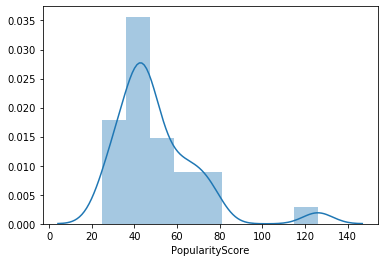

In [688]:
sns.distplot( ny_scores.PopularityScore )

In [689]:
va_scores = data_2[data_2.State == "Virginia"].groupby(["Date"]).aggregate({'PopularityScore': sum })
va_scores.head()

,PopularityScore
Date,
2020-04-01,51
2020-04-02,53
2020-04-03,47
2020-04-04,32
2020-04-05,34


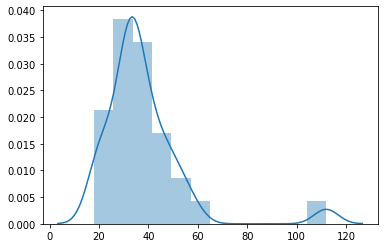

In [690]:
sns.distplot( va_scores )

In [691]:
nj_scores = data_2[data_2.State == "New Jersey"].groupby(["Date"]).aggregate({'PopularityScore': sum })
nj_scores.head()

,PopularityScore
Date,
2020-04-01,49
2020-04-02,61
2020-04-03,51
2020-04-04,41
2020-04-05,37


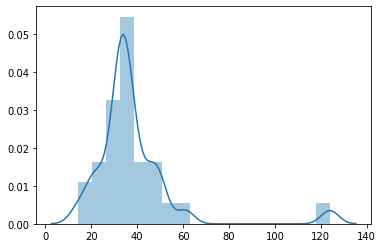

In [692]:
sns.distplot( nj_scores )

In [693]:
ca_scores = data_2[data_2.State == "California"].groupby(["Date"]).aggregate({'PopularityScore': sum })
ca_scores.head()

,PopularityScore
Date,
2020-04-01,75
2020-04-02,78
2020-04-03,67
2020-04-04,48
2020-04-05,38


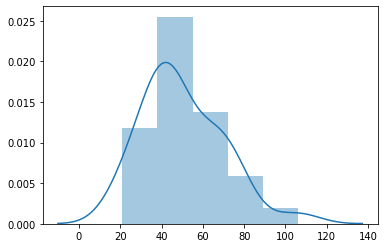

In [694]:
sns.distplot( ca_scores )

Testing if New York has higher popularity scores than Virginia. 

In [695]:
tstat, pval_ny_va, df = ttest_ind(
                                ny_scores.PopularityScore,
                                va_scores.PopularityScore,
                                alternative="larger",
                                usevar="pooled"
)
pval_ny_va

0.005805791784216331

.05 > .0058, so we reject the null hypothesis. There is statistically significant evidence that new york has a higher popularity score total throughout the month of April compared to Virginia. This supports our orginal hypothesis. 

Testing if New York has higher popularity scores than New Jersey. 

In [696]:
tstat, pval_ny_nj, df = ttest_ind(
                                ny_scores.PopularityScore,
                                nj_scores.PopularityScore,
                                alternative="larger",
                                usevar="pooled"
)
pval_ny_nj

0.009295631426010078

.05 > .0093, so we reject the null hypothesis. There is statistically significant evidence that New York has a higher popularity score total throughout the month of April compared to New Jersey. This supports our orginal hypothesis. 

Testing if New Jersey and California have similar Popularity Score totals. They currently have the 2nd and 3rd highest case count in the country, with similar case numbers. If the popularity scores follow the trend of the ratio of cases in each state, it should fail to reject the null hypothesis.

In [697]:
tstat, pval_nj_ca, df = ttest_ind(
                                nj_scores.PopularityScore,
                                ca_scores.PopularityScore,
                                alternative="two-sided",
                                usevar="pooled"
)
pval_nj_ca

0.017758371604033756

.05 > .018, so we reject the null hypothesis. There is evidence that they have a different popularity score totals. This doesn't exactly align with our hypothesis.

We are going to test if there are different trends for specific signifying words in the queries.

In [698]:
sig_word_list = []

for i in data_2.Query:
    for word in sig_words:
        if word in i:
            sig_word_list.append( word )
            break
        else:
            pass 
data_2["Sig_word"] = sig_word_list

In [699]:
data_2.head()

,Date,Query,IsImplicitIntent,State,PopularityScore,Binned,Sig_word
53,2020-04-01,what are the symptoms of the coronavirus,True,Arizona,1,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]",symptoms
109,2020-04-01,coronavirus treatment,True,Colorado,1,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]",treatment
222,2020-04-01,coronavirus treatment update,True,California,1,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]",treatment
244,2020-04-01,signs and symptoms of coronavirus,True,New York,1,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]",symptoms
314,2020-04-01,coronavirus symptoms,True,New Mexico,10,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]",symptoms


In [700]:
# date, pop score, sig word

chart_sig = data_2.pivot_table(index="Date", 
               columns='Sig_word', 
               values='PopularityScore',
               aggfunc='sum')
chart_sig.head()

Sig_word,contract,cough,cure,fever,flu,handle,hospital,how to know,how to tell,sick,sign,symptom,symptoms,symtom,treatment,vaccine,what to do
Date,,,,,,,,,,,,,,,,,
2020-04-01,NaN,1.0,31.0,3.0,12.0,NaN,2.0,NaN,NaN,NaN,36.0,101.0,1463.0,3.0,40.0,47.0,3.0
2020-04-02,NaN,NaN,29.0,3.0,20.0,1.0,1.0,NaN,NaN,NaN,38.0,68.0,1679.0,2.0,42.0,94.0,4.0
2020-04-03,NaN,NaN,29.0,NaN,11.0,NaN,2.0,NaN,1.0,NaN,28.0,31.0,1351.0,2.0,34.0,73.0,2.0
2020-04-04,NaN,NaN,16.0,NaN,4.0,NaN,2.0,NaN,NaN,NaN,12.0,14.0,1053.0,NaN,15.0,43.0,2.0
2020-04-05,NaN,NaN,12.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,13.0,10.0,1010.0,NaN,14.0,35.0,NaN


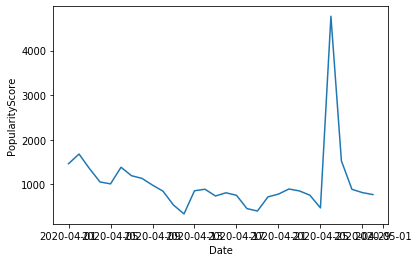

In [701]:
symptoms = sns.lineplot( x = "Date", y = "PopularityScore", data = data_2[data_2.Sig_word == "symptoms"], estimator = "sum", ci = None)

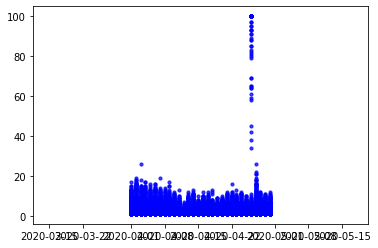

In [702]:
fig, ax = plt.subplots()
symptoms_s = ax.scatter(x= "Date", y= "PopularityScore", s=10, color='b', alpha=0.75, data=data_2[data_2.Sig_word== "symptoms"])


In [703]:
data_2[data_2.Sig_word == 'symptoms'].shape

(7432, 7)

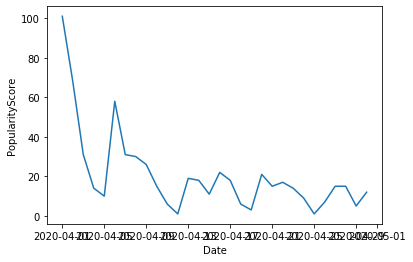

In [704]:
symptom = sns.lineplot( x = "Date", y = "PopularityScore", data = data_2[data_2.Sig_word == "symptom"], estimator = "sum", ci = None)

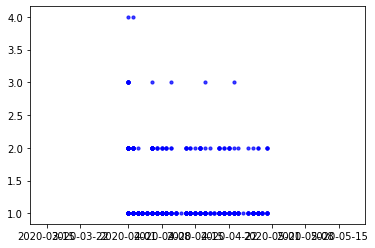

In [705]:
fig, ax = plt.subplots()
symptom_s = ax.scatter(x= "Date", y= "PopularityScore", s=10, color='b', alpha=0.75, data=data_2[data_2.Sig_word== "symptom"])


In [706]:
data_2[data_2.Sig_word == 'symptom'].shape

(502, 7)

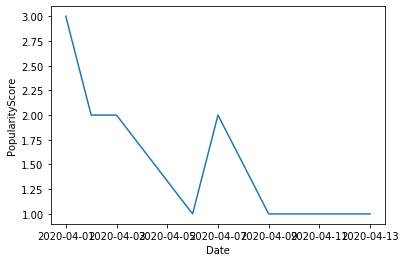

In [707]:
symtom = sns.lineplot( x = "Date", y = "PopularityScore", data = data_2[data_2.Sig_word == "symtom"], estimator = "sum", ci = None)

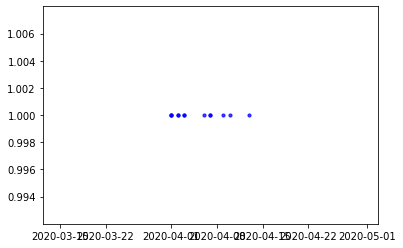

In [708]:
fig, ax = plt.subplots()
symtom_s = ax.scatter(x= "Date", y= "PopularityScore", s=10, color='b', alpha=0.75, data=data_2[data_2.Sig_word== "symtom"])


In [709]:
data_2[data_2.Sig_word == 'symtom'].shape

(13, 7)

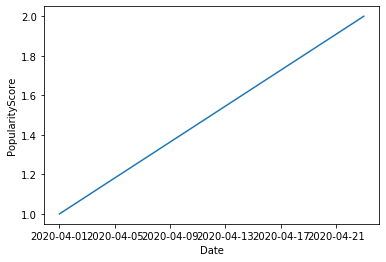

In [710]:
cough = sns.lineplot( x = "Date", y = "PopularityScore", data = data_2[data_2.Sig_word == "cough"], estimator = "sum", ci = None)

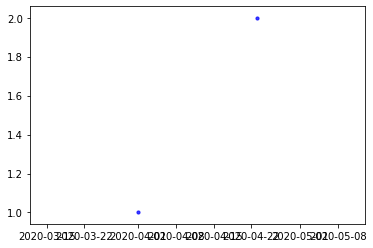

In [711]:
fig, ax = plt.subplots()
cough_s = ax.scatter(x= "Date", y= "PopularityScore", s=10, color='b', alpha=0.75, data=data_2[data_2.Sig_word== "cough"])


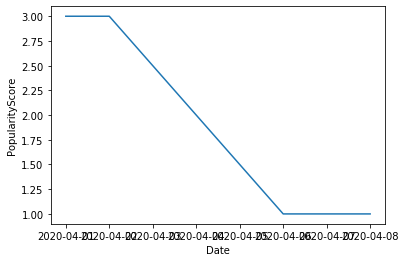

In [712]:
data_2[data_2.Sig_word == 'cough'].shape

fever = sns.lineplot( x = "Date", y = "PopularityScore", data = data_2[data_2.Sig_word == "fever"], estimator = "sum", ci = None)


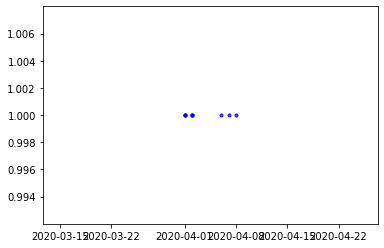

In [713]:
fig, ax = plt.subplots()
fever_s = ax.scatter(x= "Date", y= "PopularityScore", s=10, color='b', alpha=0.75, data=data_2[data_2.Sig_word== "fever"])


In [714]:
data_2[data_2.Sig_word == 'fever'].shape

(9, 7)

In [715]:
how_to_tell = "how to tell"

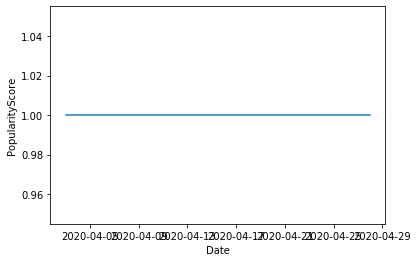

In [716]:
how_to_tell = sns.lineplot( x = "Date", y = "PopularityScore", data = data_2[data_2.Sig_word == "how to tell"], estimator = "sum", ci = None)

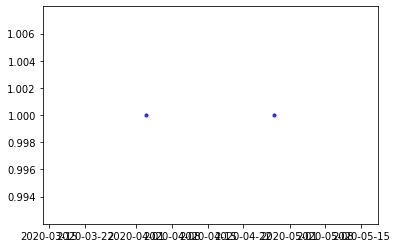

In [717]:
fig, ax = plt.subplots()
how_to_tell_s = ax.scatter(x= "Date", y= "PopularityScore", s=10, color='b', alpha=0.75, data=data_2[data_2.Sig_word== "how to tell"])


In [718]:
data_2[data_2.Sig_word == 'how to tell'].shape

(2, 7)

In [719]:
what_to_do = "what to do"

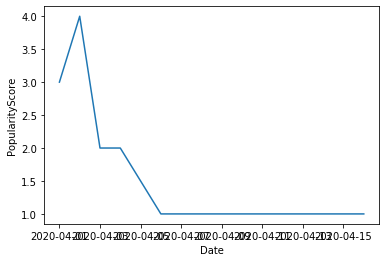

In [720]:
what_to_do = sns.lineplot( x = "Date", y = "PopularityScore", data = data_2[data_2.Sig_word == "what to do"], estimator = "sum", ci = None)

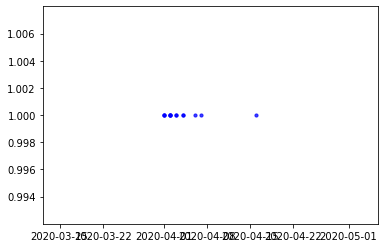

In [721]:
fig, ax = plt.subplots()
what_to_do_s = ax.scatter(x= "Date", y= "PopularityScore", s=10, color='b', alpha=0.75, data=data_2[data_2.Sig_word== "what to do"])


In [722]:
data_2[data_2.Sig_word == 'what to do'].shape

(14, 7)

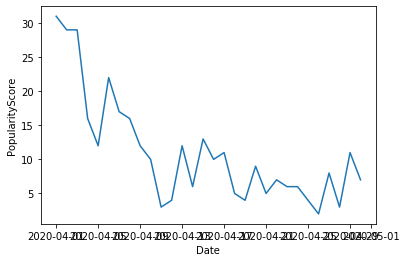

In [723]:
cure = sns.lineplot( x = "Date", y = "PopularityScore", data = data_2[data_2.Sig_word == "cure"], estimator = "sum", ci = None)

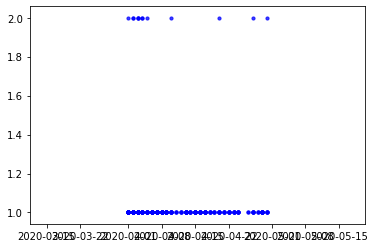

In [724]:
fig, ax = plt.subplots()
cure_s = ax.scatter(x= "Date", y= "PopularityScore", s=10, color='b', alpha=0.75, data=data_2[data_2.Sig_word== "cure"])


In [725]:
data_2[data_2.Sig_word == 'cure'].shape

(313, 7)

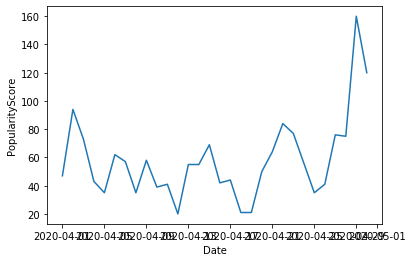

In [726]:
vaccine = sns.lineplot( x = "Date", y = "PopularityScore", data = data_2[data_2.Sig_word == "vaccine"], estimator = "sum", ci = None)

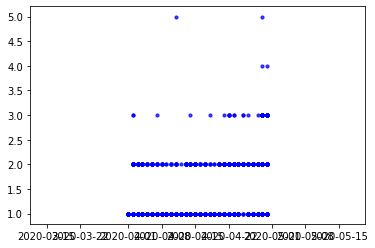

In [727]:
fig, ax = plt.subplots()
vaccine_s = ax.scatter(x= "Date", y= "PopularityScore", s=10, color='b', alpha=0.75, data=data_2[data_2.Sig_word== "vaccine"])


In [728]:
data_2[data_2.Sig_word == 'vaccine'].shape

(1317, 7)

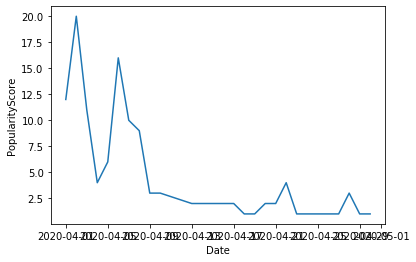

In [729]:
flu = sns.lineplot( x = "Date", y = "PopularityScore", data = data_2[data_2.Sig_word == "flu"], estimator = "sum", ci = None)

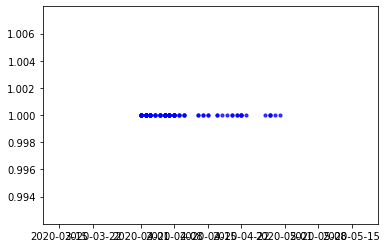

In [730]:
fig, ax = plt.subplots()
flu_s = ax.scatter(x= "Date", y= "PopularityScore", s=10, color='b', alpha=0.75, data=data_2[data_2.Sig_word== "flu"])


In [731]:
data_2[data_2.Sig_word == 'flu'].shape

(119, 7)

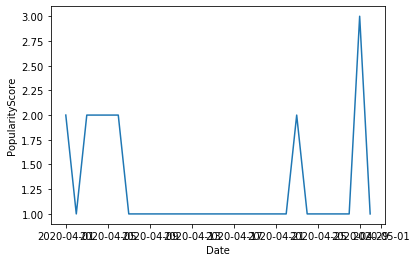

In [732]:
hospital= sns.lineplot( x = "Date", y = "PopularityScore", data = data_2[data_2.Sig_word == "hospital"], estimator = "sum", ci = None)

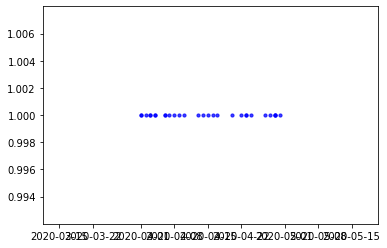

In [733]:
fig, ax = plt.subplots()
hospital_s = ax.scatter(x= "Date", y= "PopularityScore", s=10, color='b', alpha=0.75, data=data_2[data_2.Sig_word== "hospital"])


In [734]:
data_2[data_2.Sig_word == 'hospital'].shape

(29, 7)

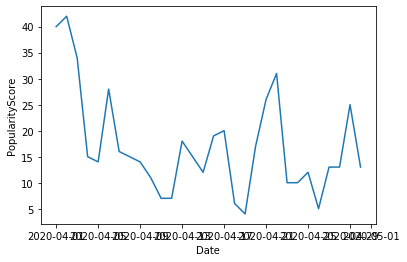

In [735]:
treatment = sns.lineplot( x = "Date", y = "PopularityScore", data = data_2[data_2.Sig_word == "treatment"], estimator = "sum", ci = None)

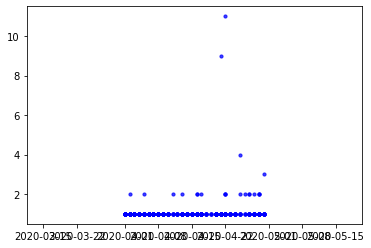

In [736]:
fig, ax = plt.subplots()
treatment_s = ax.scatter(x= "Date", y= "PopularityScore", s=10, color='b', alpha=0.75, data=data_2[data_2.Sig_word== "treatment"])


In [737]:
data_2[data_2.Sig_word == 'treatment'].shape

(471, 7)

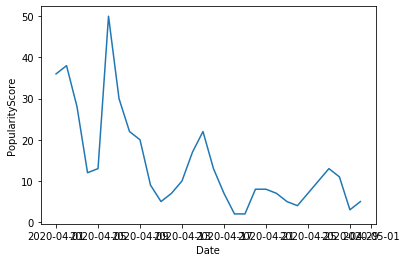

In [738]:
sign = sns.lineplot( x = "Date", y = "PopularityScore", data = data_2[data_2.Sig_word == "sign"], estimator = "sum", ci = None)

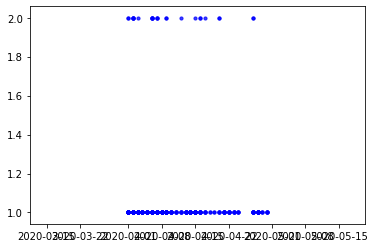

In [739]:
fig, ax = plt.subplots()
sign_s = ax.scatter(x= "Date", y= "PopularityScore", s=10, color='b', alpha=0.75, data=data_2[data_2.Sig_word== "sign"])


In [740]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [741]:
text=("symptoms symptom symtom symptome cough fever sick do_I_have how_to_tell how_to_know self-diagnos what_to_do cure vaccine vaccin flu hospital treatment sign ill cold vomit puke throw_up spew pale gruesome remedy curative therapeutic handle heal signal indication indicate contract")

In [742]:
wordcloud = WordCloud(width=1200, height=900, max_font_size=110, margin=0).generate(text)

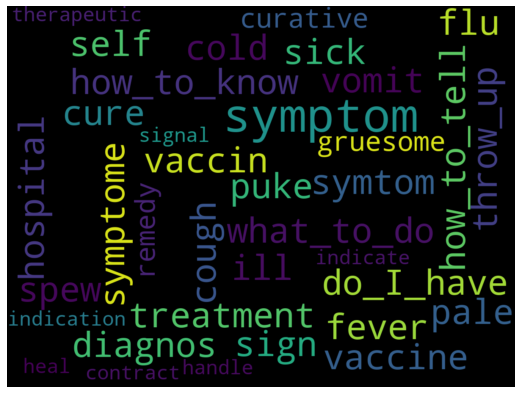

In [743]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


TIME SERIES FORECASTING

In [744]:
data_2.set_index('Date')

,Query,IsImplicitIntent,State,PopularityScore,Binned,Sig_word
Date,,,,,,
2020-04-01,what are the symptoms of the coronavirus,True,Arizona,1,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]",symptoms
2020-04-01,coronavirus treatment,True,Colorado,1,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]",treatment
2020-04-01,coronavirus treatment update,True,California,1,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]",treatment
2020-04-01,signs and symptoms of coronavirus,True,New York,1,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]",symptoms
2020-04-01,coronavirus symptoms,True,New Mexico,10,"(2020-03-31 23:18:14.400000, 2020-04-03 21:36:00]",symptoms
...,...,...,...,...,...,...
2020-04-30,asymptomatic coronavirus,True,Massachusetts,2,"(2020-04-27 02:24:00, 2020-04-30]",symptom
2020-04-30,coronavirus symptoms,True,West Virginia,4,"(2020-04-27 02:24:00, 2020-04-30]",symptoms
2020-04-30,coronavirus symptoms list,True,California,1,"(2020-04-27 02:24:00, 2020-04-30]",symptoms


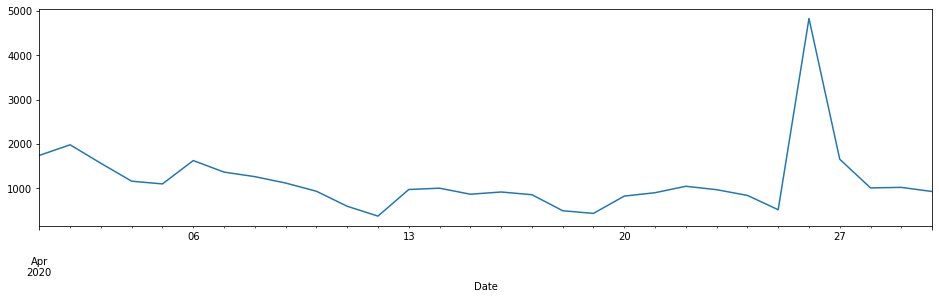

In [745]:
chart_3.loc['04/01/2020':'04/30/2020']['PopularityScore'].resample('D').sum().plot(figsize=(16, 4))


In [746]:
data_2.dtypes

Date                datetime64[ns]
Query                       object
IsImplicitIntent              bool
State                       object
PopularityScore              int64
Binned                    category
Sig_word                    object
dtype: object

We are incorporating external May data to get more accurate time forecasting.

In [747]:
may_data_raw = pd.read_csv("May Cases.csv")
may_data_raw.head()

,Date,Query,IsImplicitIntent,Country,PopularityScore
0,5/1/20,utah covid cases,FALSE,United States,1.0
1,5/1/20,coronavirus cases worldometer,FALSE,United States,1.0
2,5/1/20,que es el covid 19,FALSE,Mexico,14.0
3,5/1/20,attestation employeur coronavirus,FALSE,France,1.0
4,5/1/20,famotidine covid,FALSE,United States,1.0


In [748]:
# Going through same data cleaning process as with data_2
may_data = may_data_raw[may_data_raw.Country == "United States"]

In [749]:
may_data.PopularityScore = may_data.PopularityScore.astype(int)
may_data.Date = pd.to_datetime(may_data['Date'])
may_data.IsImplicitIntent = may_data.IsImplicitIntent.astype(bool)

In [750]:
may_data_1 = may_data.drop("Country", axis=1)
may_data_2 = may_data_1[may_data_1["Query"].str.contains('|'.join(sig_words))]
may_data_2.shape

(7093, 4)

In [751]:
may_data_2['Binned'] = pd.cut(may_data_2['Date'], bins = 10)

In [836]:
may_data_2.head()

,Date,Query,IsImplicitIntent,PopularityScore,Binned
33,2020-05-01,flu deaths vs coronavirus deaths,True,1,"(2020-04-30 23:16:48, 2020-05-04]"
37,2020-05-01,what are the signs of coronavirus,True,1,"(2020-04-30 23:16:48, 2020-05-04]"
46,2020-05-01,progression of covid 19 symptoms,True,1,"(2020-04-30 23:16:48, 2020-05-04]"
87,2020-05-01,what are the symptoms of coronavirus,True,1,"(2020-04-30 23:16:48, 2020-05-04]"
90,2020-05-01,is dizziness a symptom of coronavirus,True,1,"(2020-04-30 23:16:48, 2020-05-04]"


In [837]:
may_chart = may_data_2.groupby(["Date"]).aggregate({'PopularityScore': sum })
may_chart

,PopularityScore
Date,
2020-05-01,311
2020-05-02,175
2020-05-03,218
2020-05-04,342
2020-05-05,347
2020-05-06,363
2020-05-07,334
2020-05-08,295
2020-05-09,205


In [838]:
may_chart.PopularityScore

Date
2020-05-01    311
2020-05-02    175
2020-05-03    218
2020-05-04    342
2020-05-05    347
2020-05-06    363
2020-05-07    334
2020-05-08    295
2020-05-09    205
2020-05-10    178
2020-05-11    401
2020-05-12    345
2020-05-13    322
2020-05-14    328
2020-05-15    283
2020-05-16    164
2020-05-17    173
2020-05-18    353
2020-05-19    291
2020-05-20    269
2020-05-21    262
2020-05-22    239
2020-05-23    137
2020-05-24    144
2020-05-25    155
2020-05-26    272
2020-05-27    264
2020-05-28    266
2020-05-29    208
2020-05-30    151
2020-05-31    148
Name: PopularityScore, dtype: int64

In [752]:
# combining both data frames
total_data = pd.concat([data_2, may_data_2])

In [753]:
total_data.shape

(17716, 7)

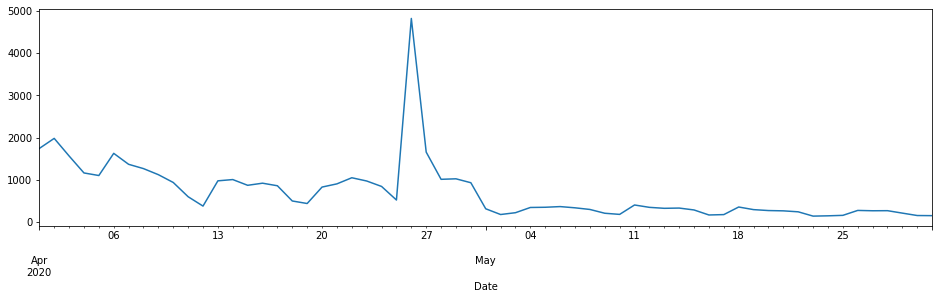

In [754]:
# Plotting total popularity scores over 2 months 
total_chart = total_data.groupby(["Date"]).aggregate({'PopularityScore': sum })
total_chart.loc['04/01/2020':'05/31/2020']['PopularityScore'].resample('D').sum().plot(figsize=(16, 4))

In [755]:
from fbprophet import Prophet
from dateutil.easter import easter

In [756]:
chart_4 = total_chart.groupby(["Date"]).aggregate({'PopularityScore': sum })
chart_4 = chart_4.reset_index()


In [757]:
chart_4["ds"]=chart_4.Date
chart_4["y"]=chart_4.PopularityScore


In [758]:
chart_4.head()

,Date,PopularityScore,ds,y
0,2020-04-01,1742,2020-04-01,1742
1,2020-04-02,1981,2020-04-02,1981
2,2020-04-03,1564,2020-04-03,1564
3,2020-04-04,1161,2020-04-04,1161
4,2020-04-05,1100,2020-04-05,1100


In [759]:
chart_4.tail()

,Date,PopularityScore,ds,y
56,2020-05-27,264,2020-05-27,264
57,2020-05-28,266,2020-05-28,266
58,2020-05-29,208,2020-05-29,208
59,2020-05-30,151,2020-05-30,151
60,2020-05-31,148,2020-05-31,148


In [760]:
model = Prophet(daily_seasonality = True)

In [761]:
%time model.fit(chart_4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


CPU times: user 324 ms, sys: 12.3 ms, total: 336 ms
Wall time: 355 ms


In [762]:
from fbprophet.diagnostics import cross_validation

In [763]:
cv_results = cross_validation(model,  initial="54 days", horizon="5 days", period="1 day")

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-05-25 00:00:00 and 2020-05-26 00:00:00


In [764]:
cross_validation?

In [765]:
cv_results.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-05-26,45.607004,-730.022211,820.063917,272,2020-05-25
1,2020-05-27,67.325696,-700.180885,782.923504,264,2020-05-25
2,2020-05-28,60.470337,-684.730738,782.000960,266,2020-05-25
3,2020-05-29,-129.294251,-873.807609,648.755864,208,2020-05-25
4,2020-05-30,-363.347393,-1162.895836,450.701926,151,2020-05-25


In [766]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p.head(20)

,horizon,mse,rmse,mae,mape,coverage
0,1 days,42733.829895,206.721624,205.681458,0.766485,1.0
1,2 days,38125.387516,195.257234,195.252054,0.736831,1.0
2,3 days,74123.384213,272.256100,265.556359,1.168986,1.0
3,4 days,183197.650664,428.015947,419.957635,2.475112,1.0
4,5 days,132276.662941,363.698588,257.319367,1.704121,1.0


In [767]:
from sklearn.metrics import r2_score

r2_score(cv_results.y, cv_results.yhat)

-35.46726677633895

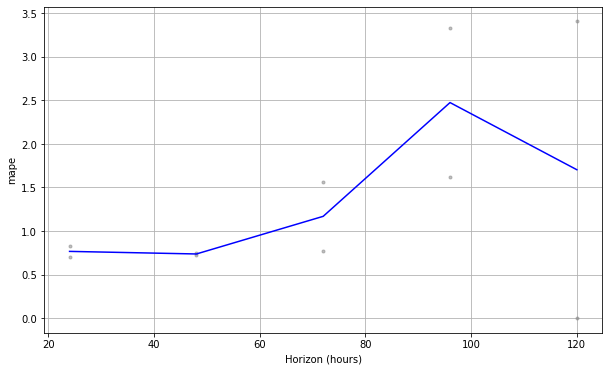

In [768]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv_results, metric='mape')

In [769]:
future = model.make_future_dataframe(periods=30, include_history=True)
future.head()

,ds
0,2020-04-01
1,2020-04-02
2,2020-04-03
3,2020-04-04
4,2020-04-05


In [770]:
forecast = model.predict(future)

In [771]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-01,81.865582,730.535006,2145.754734,81.865582,81.865582,1357.416930,1357.416930,1357.416930,1311.863096,1311.863096,1311.863096,45.553834,45.553834,45.553834,0.0,0.0,0.0,1439.282512
1,2020-04-02,58.881089,727.998069,2206.898288,58.881089,58.881089,1374.548109,1374.548109,1374.548109,1311.863096,1311.863096,1311.863096,62.685013,62.685013,62.685013,0.0,0.0,0.0,1433.429198
2,2020-04-03,35.896595,556.152406,1952.411589,35.896595,35.896595,1222.568085,1222.568085,1222.568085,1311.863096,1311.863096,1311.863096,-89.295010,-89.295010,-89.295010,0.0,0.0,0.0,1258.464681
3,2020-04-04,12.912102,304.197123,1766.074079,12.912102,12.912102,1031.377597,1031.377597,1031.377597,1311.863096,1311.863096,1311.863096,-280.485499,-280.485499,-280.485499,0.0,0.0,0.0,1044.289699
4,2020-04-05,-10.072391,767.090154,2205.210139,-10.072391,-10.072391,1498.075471,1498.075471,1498.075471,1311.863096,1311.863096,1311.863096,186.212376,186.212376,186.212376,0.0,0.0,0.0,1488.003080


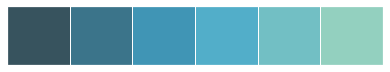

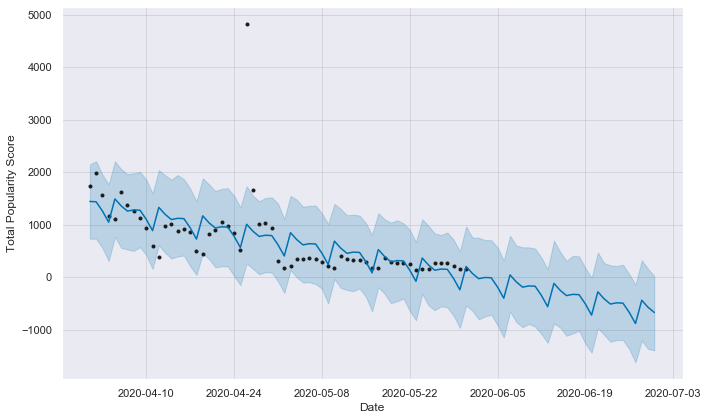

In [860]:
import matplotlib.style as style
#style.use('fivethirtyeight')
sns.set(style = "darkgrid")
sns.palplot(sns.color_palette("GnBu_d"))
model.plot(forecast, xlabel = "Date", ylabel = "Total Popularity Score");

CLUSTERING WITH K-MEANS

In [260]:
cluster_data = total_data.drop(["Date"], axis=1)

In [261]:
cluster_data = cluster_data.drop(["Query"], axis=1)

In [262]:
cluster_data = cluster_data.drop(["Binned"], axis=1)

In [263]:
cluster_data.IsImplicitIntent = cluster_data.IsImplicitIntent.astype(int)

In [147]:
cluster_data = pd.get_dummies(cluster_data)

In [264]:
total_data = total_data.drop(["Date", "Query", "Binned"], axis=1)

In [265]:
total_data.IsImplicitIntent = total_data.IsImplicitIntent.astype(int)

In [185]:
total_data = pd.get_dummies(total_data)

In [266]:
total_data

,IsImplicitIntent,State,PopularityScore,Sig_word
53,1,Arizona,1,symptoms
109,1,Colorado,1,treatment
222,1,California,1,treatment
244,1,New York,1,symptoms
314,1,New Mexico,10,symptoms
...,...,...,...,...
773809,0,California,1,symptoms
774267,0,Alaska,7,symptoms
774783,1,California,2,hospital
775072,0,South Carolina,2,symptoms


In [187]:
total_data.columns

Index(['IsImplicitIntent', 'PopularityScore', 'State_Alabama', 'State_Alaska',
       'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado',
       'State_Connecticut', 'State_Delaware', 'State_District Of Columbia',
       'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho',
       'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
       'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_New Hampshire',
       'State_New Jersey', 'State_New Mexico', 'State_New York',
       'State_North Carolina', 'State_North Dakota', 'State_Ohio',
       'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_Rhode Island', 'State_South Carolina', 'State_South Dakota',
       'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Vermont',
       '

In [188]:
from sklearn.preprocessing import MinMaxScaler

total_data_normalized = MinMaxScaler().fit_transform(total_data) # this line scales our data

total_data_normalized = pd.DataFrame(              #this pops it back in data frame format 
                    total_data_normalized,
                    columns=total_data.columns) 

numerical_data_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [190]:
numerical_data_normalized.columns = ['IsImplicitIntent', 'PopularityScore', 'State_Alabama', 'State_Alaska',
       'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado',
       'State_Connecticut', 'State_Delaware', 'State_District Of Columbia',
       'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho',
       'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
       'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_New Hampshire',
       'State_New Jersey', 'State_New Mexico', 'State_New York',
       'State_North Carolina', 'State_North Dakota', 'State_Ohio',
       'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_Rhode Island', 'State_South Carolina', 'State_South Dakota',
       'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Vermont',
       'State_Virginia', 'State_Washington', 'State_West Virginia',
       'State_Wisconsin', 'State_Wyoming', 'Sig_word_cold',
       'Sig_word_contract', 'Sig_word_cough', 'Sig_word_cure',
       'Sig_word_fever', 'Sig_word_flu', 'Sig_word_handle',
       'Sig_word_hospital', 'Sig_word_how to know', 'Sig_word_how to tell',
       'Sig_word_sick', 'Sig_word_sign', 'Sig_word_symptom',
       'Sig_word_symptoms', 'Sig_word_symtom', 'Sig_word_treatment',
       'Sig_word_vaccine', 'Sig_word_what to do']

In [191]:
numerical_data_normalized

,IsImplicitIntent,PopularityScore,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,...,Sig_word_how to know,Sig_word_how to tell,Sig_word_sick,Sig_word_sign,Sig_word_symptom,Sig_word_symptoms,Sig_word_symtom,Sig_word_treatment,Sig_word_vaccine,Sig_word_what to do
0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24496,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24497,0.0,0.060606,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24498,1.0,0.010101,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24499,0.0,0.010101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [197]:
from sklearn.cluster import KMeans

In [198]:
def evaluate_k_kmeans_inertia(k):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(numerical_data_normalized)
    return estimator_kmeans.inertia_

In [199]:
%%time 
range_k = [2, 3, 4, 5, 8, 10, 15, 20, 25, 30]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=8
running Kmeans with k=10
running Kmeans with k=15
running Kmeans with k=20
running Kmeans with k=25
running Kmeans with k=30
CPU times: user 25.2 s, sys: 908 ms, total: 26.1 s
Wall time: 13.5 s


In [200]:
results_k # so we get a 2d array back with the k + the intertia value

{2: 37019.99736238564,
 3: 33503.45055467565,
 4: 30611.346675821656,
 5: 28325.676163573677,
 8: 26267.300605694236,
 10: 25336.349195649604,
 15: 22553.574930166633,
 20: 21081.811478139967,
 25: 19321.727478464214,
 30: 18057.90981463239}

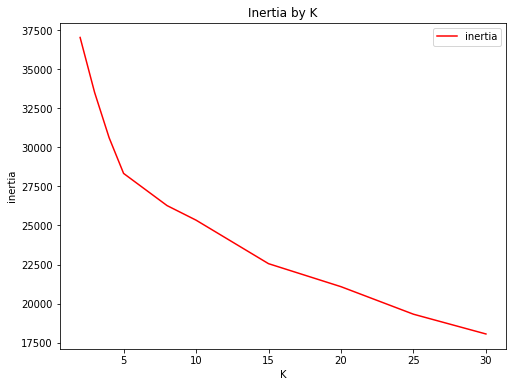

In [201]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend()

In [206]:
from kneed import KneeLocator

In [207]:
kn = KneeLocator([c[0] for c in results_k.items()], [c[1] for c in results_k.items()], curve='convex', direction='decreasing')

In [208]:
kn.knee

3

In [209]:
estimator_kmeans = KMeans(random_state=42, n_clusters=3) # instantiate our Kmeans model

estimator_kmeans.fit(numerical_data_normalized) # fit the model to our vehicles data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [210]:
estimator_kmeans.predict(numerical_data_normalized)

array([1, 2, 2, ..., 2, 0, 2], dtype=int32)

In [211]:
centroids = estimator_kmeans.cluster_centers_
centroids

array([[-1.09467990e-13,  2.00022773e-02,  1.35651509e-02,
         3.05693542e-03,  2.55063049e-02,  8.69316011e-03,
         7.79518533e-02,  2.11119603e-02,  1.66220864e-02,
         3.72564005e-03,  7.16469240e-03,  5.01528468e-02,
         3.07604127e-02,  4.68093237e-03,  8.02445548e-03,
         3.91669851e-02,  1.82460833e-02,  1.27053878e-02,
         8.31104318e-03,  1.36606802e-02,  1.09858617e-02,
         5.25410776e-03,  2.66526557e-02,  2.66526557e-02,
         2.77990065e-02,  2.56018342e-02,  7.06916316e-03,
         1.76729079e-02,  4.29881544e-03,  7.83339702e-03,
         8.50210164e-03,  4.77646160e-03,  4.03133359e-02,
         6.59151700e-03,  6.59151700e-02,  2.93274742e-02,
         4.68093237e-03,  3.63011081e-02,  1.10813909e-02,
         1.49025602e-02,  4.83377914e-02,  5.25410776e-03,
         1.29919755e-02,  3.24799389e-03,  1.94879633e-02,
         6.06610623e-02,  8.50210164e-03,  7.64233856e-04,
         3.70653420e-02,  2.88498280e-02,  7.26022163e-0

In [212]:
centroids.shape

(3, 71)

In [213]:
estimator_kmeans.inertia_

33503.45055467565

In [214]:
estimator_kmeans.labels_.shape # these are the predicted cluster labels

(24501,)

In [267]:
total_data.shape # this is our original data frame

(24501, 4)

In [269]:
total_data["cluster_id"] = estimator_kmeans.labels_ 

In [270]:
total_data.head()

,IsImplicitIntent,State,PopularityScore,Sig_word,cluster_id
53,1,Arizona,1,symptoms,1
109,1,Colorado,1,treatment,2
222,1,California,1,treatment,2
244,1,New York,1,symptoms,1
314,1,New Mexico,10,symptoms,1


In [271]:
total_data.cluster_id.value_counts()

0    10468
1     7432
2     6601
Name: cluster_id, dtype: int64

In [221]:
ndn = numerical_data_normalized

In [222]:
ndn.head()

,IsImplicitIntent,PopularityScore,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,...,Sig_word_how to tell,Sig_word_sick,Sig_word_sign,Sig_word_symptom,Sig_word_symptoms,Sig_word_symtom,Sig_word_treatment,Sig_word_vaccine,Sig_word_what to do,cluster_id
0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,1.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [273]:
def cluster_summary(cluster_id):  # define a function and call it cluster_summary, that takes the input of a cluster id/label
    cluster = total_data[total_data.cluster_id==cluster_id] # pull out all the rows with that ID
    cluster_summary = cluster[categorical.columns].mode().to_dict(orient="records")[0] # get mode for categoricals
    cluster_summary.update(cluster.mean().to_dict()) # get means for numerical (only does for numerical if we didnt specify)
    return cluster_summary # display the summary 


In [274]:
cluster_summary(0)

{'State': 'California',
 'Sig_word': 'symptoms',
 'IsImplicitIntent': 0.0,
 'PopularityScore': 2.9802254489873903,
 'cluster_id': 0.0}

In [276]:
def cluster_comparison(*cluster_ids):
    summaries = []
    for cluster_id in cluster_ids:
        summaries.append(cluster_summary(cluster_id))
    return pd.DataFrame(summaries).set_index("cluster_id").T

In [279]:
cluster_comparison(0,1,2)

cluster_id,0.0,1.0,2.0
State,California,California,California
Sig_word,symptoms,symptoms,flu
IsImplicitIntent,0,1,0.984396
PopularityScore,2.98023,4.18555,1.52901


In [272]:
categorical.columns

Index(['State', 'Sig_word'], dtype='object')

//////////// k=5

In [280]:
estimator_kmeans = KMeans(random_state=42, n_clusters=5) # instantiate our Kmeans model
estimator_kmeans.fit(numerical_data_normalized) # fit the model to our vehicles data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [281]:
estimator_kmeans.predict(numerical_data_normalized)

array([2, 1, 1, ..., 1, 0, 3], dtype=int32)

In [286]:
centroids = estimator_kmeans.cluster_centers_

In [283]:
estimator_kmeans.inertia_

28652.61887924193

In [284]:
total_data["cluster_id"] = estimator_kmeans.labels_ 

In [285]:
cluster_comparison(0,1,2,3,4)

cluster_id,0.0,1.0,2.0,3.0,4.0
State,California,California,California,California,California
Sig_word,symptoms,vaccine,symptoms,flu,vaccine
IsImplicitIntent,0,1,1,0.965401,0
PopularityScore,3.72233,1.22241,4.18555,1.90225,1.16864


//////////// k=10

In [306]:
estimator_kmeans = KMeans(random_state=42, n_clusters=10) # instantiate our Kmeans model
estimator_kmeans.fit(numerical_data_normalized) # fit the model to our vehicles data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [307]:
estimator_kmeans.predict(numerical_data_normalized)

array([1, 8, 8, ..., 4, 5, 2], dtype=int32)

In [308]:
centroids = estimator_kmeans.cluster_centers_

In [309]:
estimator_kmeans.inertia_

25577.125974636627

In [310]:
total_data["cluster_id"] = estimator_kmeans.labels_ 

In [311]:
cluster_comparison(0,1,2,3,4,5,6,7,8,9)

cluster_id,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
State,California,California,California,New York,California,California,California,California,California,California
Sig_word,vaccine,symptoms,flu,symptoms,symptom,symptoms,vaccine,symptom,treatment,sign
IsImplicitIntent,0,1,0.965401,0,1,0,1,0,1,0
PopularityScore,1.26636,4.18555,1.90225,3.43898,1.16893,3.77149,1.31343,1.106,1.08705,1.05277


In [ ]:
//////////// k=15

In [312]:
estimator_kmeans = KMeans(random_state=42, n_clusters=15) # instantiate our Kmeans model
estimator_kmeans.fit(numerical_data_normalized) # fit the model to our vehicles data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [313]:
estimator_kmeans.predict(numerical_data_normalized)

array([11, 12, 12, ..., 12,  3,  2], dtype=int32)

In [314]:
centroids = estimator_kmeans.cluster_centers_

In [315]:
estimator_kmeans.inertia_

24005.74364015776

In [316]:
total_data["cluster_id"] = estimator_kmeans.labels_ 

In [317]:
cluster_comparison(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14)

cluster_id,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
State,California,New York,California,California,California,California,California,California,Pennsylvania,California,California,Texas,California,Texas,Florida
Sig_word,treatment,symptoms,flu,symptoms,vaccine,vaccine,cure,symptoms,symptoms,symptom,symptom,symptoms,treatment,symptoms,symptoms
IsImplicitIntent,0,1,0.965401,0,0,1,0,1,0,0,1,1,1,0,0
PopularityScore,1.06243,4.29415,1.90225,2.89951,1.26636,1.31343,1.03846,2.4575,3.27119,1.18762,1.23307,4.20516,1.12219,4.46346,3.11186


In [337]:
total_data.groupby(["State"]).count().sort_values(by=["IsImplicitIntent"], ascending=False)

,IsImplicitIntent,PopularityScore,Sig_word,cluster_id
State,,,,
California,1978,1978,1978,1978
New York,1574,1574,1574,1574
Texas,1478,1478,1478,1478
Florida,1212,1212,1212,1212
Pennsylvania,1202,1202,1202,1202
Illinois,956,956,956,956
New Jersey,952,952,952,952
Virginia,901,901,901,901
Ohio,896,896,896,896


In [338]:
total_data.groupby(["Sig_word"]).count().sort_values(by=["IsImplicitIntent"], ascending=False)

,IsImplicitIntent,State,PopularityScore,cluster_id
Sig_word,,,,
symptoms,14858,14858,14858,14858
flu,2977,2977,2977,2977
vaccine,2922,2922,2922,2922
symptom,1003,1003,1003,1003
treatment,940,940,940,940
sign,759,759,759,759
cure,625,625,625,625
hospital,220,220,220,220
sick,47,47,47,47


UPLOADING MAY DATA (real cases)

In [26]:
i = 8
j = str(0) + str(i)
j

'08'

In [54]:
begmay = []

i = 1
while i < 10:
    file = '/Users/Daniel/Desktop/i_X Data Science/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-0' + str(i) + '-2020.csv'
    data_raw = pd.read_csv(file)
    data_raw = data_raw.Confirmed.sum()
    begmay.append(data_raw)
    i += 1

In [55]:
maycon = []

i = 10
while i < 32:
    file = '/Users/Daniel/Desktop/i_X Data Science/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-' + str(i) + '-2020.csv'
    data_raw = pd.read_csv(file)
    data_raw = data_raw.Confirmed.sum()
    maycon.append(data_raw)
    i += 1

In [56]:
len(begmay)

9

In [57]:
len(maycon)

22

In [58]:
may_tot = begmay + maycon
len(may_tot)

31

In [61]:
april_last = 1069424

In [59]:
may_tot

[1103461,
 1132539,
 1158040,
 1180375,
 1204351,
 1228603,
 1257023,
 1283929,
 1309550,
 1329260,
 1347881,
 1369574,
 1390406,
 1417774,
 1442824,
 1467820,
 1486757,
 1508308,
 1528568,
 1551853,
 1577147,
 1600937,
 1622612,
 1643246,
 1662302,
 1680913,
 1699176,
 1721753,
 1746019,
 1770165,
 1790172]

In [62]:
may_new = []
i = 0
while i < 31:
    if i == 0:
        diff = may_tot[i] - april_last
    else:
        diff = may_tot[i] - may_tot[i-1]
    may_new.append(diff)
    i += 1

In [64]:
len(may_new)

31

In [65]:
may_new

[34037,
 29078,
 25501,
 22335,
 23976,
 24252,
 28420,
 26906,
 25621,
 19710,
 18621,
 21693,
 20832,
 27368,
 25050,
 24996,
 18937,
 21551,
 20260,
 23285,
 25294,
 23790,
 21675,
 20634,
 19056,
 18611,
 18263,
 22577,
 24266,
 24146,
 20007]

In [52]:
may_tot = begmay + maycon
len(may_tot)

119

In [24]:
data_raw.Confirmed

0      10164
1        379
2          0
3      11383
4       4043
5      69329
6      19879
7      33765
8       6565
9         49
10      6389
11     40982
12     34002
13       103
14       151
15       634
16      2260
17     79007
18     24627
19     12373
20      7159
21      6677
22     31815
23      1462
24     33373
25     78462
26     47552
27     11799
28      9674
29     10157
30       459
31      8407
32      6152
33      3160
34    140206
35      5069
36    337055
37     15274
38      1518
39        19
40     24777
41      4613
42      3286
43     60459
44      2256
45     11450
46      7792
47      3614
48     15544
49     40555
50      6362
51       926
52        69
53     25070
54     17122
55      1366
56     10418
57       669
Name: Confirmed, dtype: int64

In [20]:
data_raw.Confirmed.sum()

1103461

In [67]:
may_pop = [311,
175,
218,
342,
347,
363,
334,
295,
205,
178,
401,
345,
322,
328,
283,
164,
173,
353,
291,
269,
262,
239,
137,
144,
155,
272,
264,
266,
208,
151,
148]

In [72]:
may_pop

[311,
 175,
 218,
 342,
 347,
 363,
 334,
 295,
 205,
 178,
 401,
 345,
 322,
 328,
 283,
 164,
 173,
 353,
 291,
 269,
 262,
 239,
 137,
 144,
 155,
 272,
 264,
 266,
 208,
 151,
 148]

In [71]:
may_new

[34037,
 29078,
 25501,
 22335,
 23976,
 24252,
 28420,
 26906,
 25621,
 19710,
 18621,
 21693,
 20832,
 27368,
 25050,
 24996,
 18937,
 21551,
 20260,
 23285,
 25294,
 23790,
 21675,
 20634,
 19056,
 18611,
 18263,
 22577,
 24266,
 24146,
 20007]

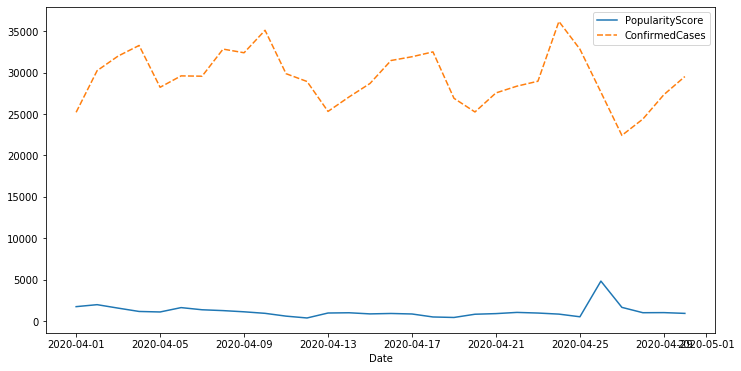

In [188]:
plt.figure(figsize=(12, 6))
graph_3 = sns.lineplot(data = chart_3)
graph_3

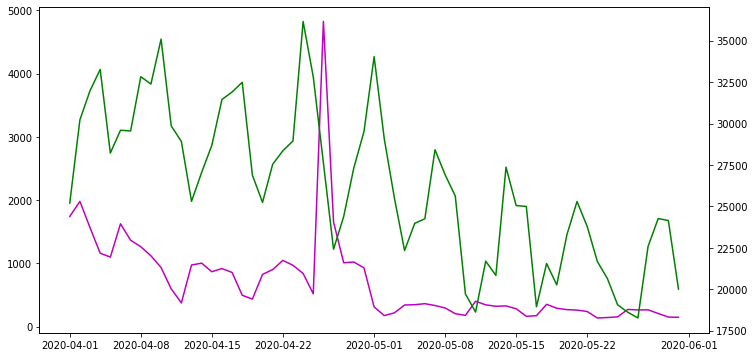

In [268]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.lineplot(data=results.PopularityScore, color="m")
ax2 = plt.twinx()
sns.lineplot(data=results.ConfirmedCases, color="g", ax=ax2)